## Linear regression

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Floors,Rooms,...,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đồng xoài,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,1.032339,4,6,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.379909,4,5,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.379909,4,5,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-0.707473,4,6,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.554674,1,1,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


##### Input variables

- Practice training

In [4]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,...,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đồng xoài,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,1.032339,4,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,0.379909,4,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,0.379909,4,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,-0.707473,4,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.554674,1,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


##### Target variables

- Practice training

In [5]:
y = df[['Price']]
y.head()

,Price
0,-2.025937
1,-1.983353
2,-1.983353
3,-1.968324
4,-1.900692


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=500)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3897, 1859) (975, 1859)
(3897, 1) (975, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [7]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [8]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 1.26794913e+02 -2.20537471e+01  3.37606394e-01 ...  3.56292725e-01
  -7.72132874e-02 -1.75590515e-02]]
Interception  :  [-1.52877159e+10]


##### Real estate price prediction

- On the train set

In [9]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[ 0.96238327],
       [-1.30677986],
       [-0.02994347],
       ...,
       [ 0.26717758],
       [-0.64279175],
       [-0.25529099]])

- Prediction on validation set

In [10]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 4.72948074e-01],
       [ 2.32696533e-03],
       [-6.41317368e-01],
       [ 1.83654976e+00],
       [-5.91232300e-01],
       [-5.15306473e-01],
       [ 7.84536362e-01],
       [-1.52085498e+09],
       [-1.35533714e+00],
       [-8.04965973e-01],
       [ 2.09573936e+00],
       [-1.52085498e+09],
       [ 1.36527961e+12],
       [-1.44432640e+00],
       [-1.59185410e-01],
       [-3.47145081e-01],
       [ 3.41528702e+00],
       [ 2.45405197e-01],
       [-1.52085498e+09],
       [-8.35981369e-01],
       [ 8.99372101e-02],
       [-1.02613449e-01],
       [-5.36302567e-01],
       [-6.82826996e-01],
       [-2.27624893e-01],
       [ 1.05805397e+00],
       [ 8.61879349e-01],
       [ 1.03363037e+00],
       [-1.12768745e+00],
       [ 5.05392075e-01],
       [ 1.12248611e+00],
       [ 2.29206635e+11],
       [ 1.90656662e-01],
       [-2.96001434e-02],
       [-7.38527298e-01],
       [ 2.47581100e+00],
       [-9.81864929e-01],
       [ 4.61025238e-02],
       [ 2.8

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [11]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.1153475862278227


- Validation set

In [12]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.0933243651594593e+23


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [13]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.8864738602414762


- Validation set

In [14]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: -1.1683588703952127e+23


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [15]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 0.7221064634717782


- Validation set

In [16]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 296374702473.1442


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

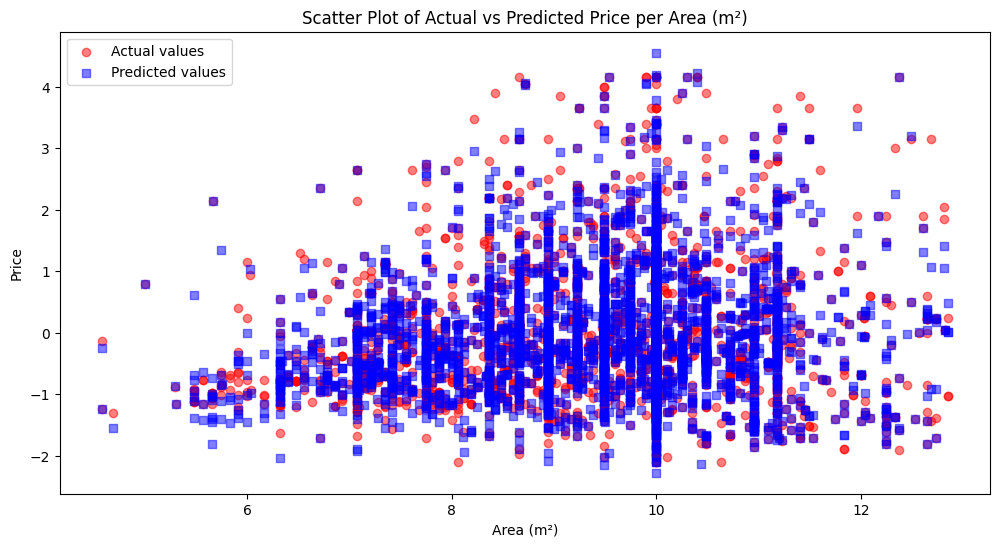

In [17]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

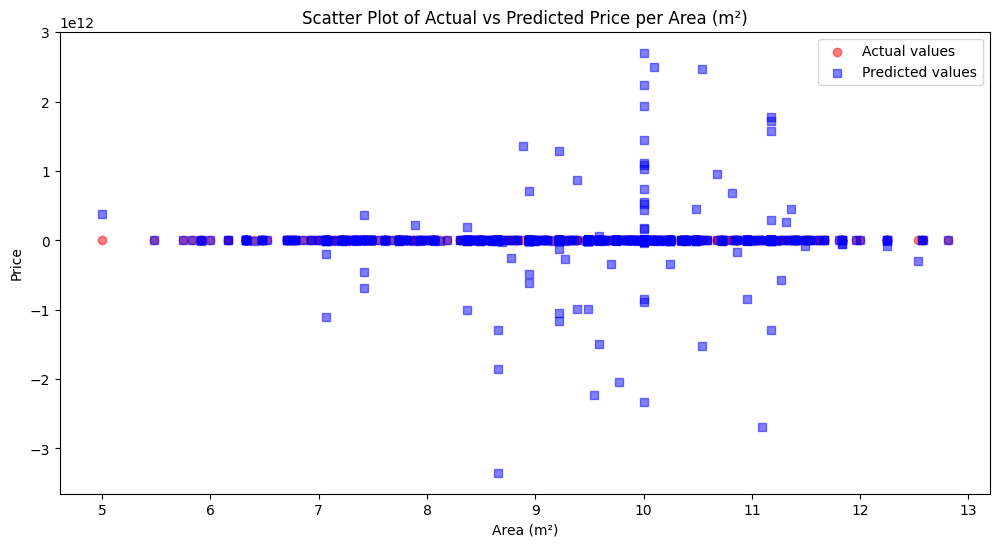

In [18]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.